In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
visa_df = pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**BoxPlot**
- BoxPlot is used to identify the outliers 
- Outliers is an observation having a huge positive or huge negative value
- Q1 = 25p
- Q2 = 50p
- Q3 = 75p
- IQR = Inter Quartile Range = Q3 - Q1
- Q3 + 1.5 * IQR and Q3 - 1.5 * IQR

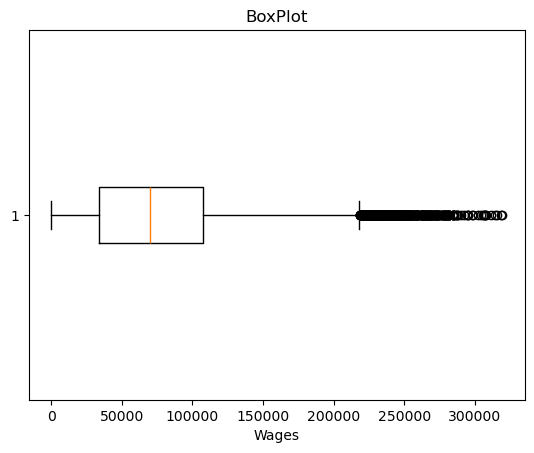

In [41]:
wage_data = visa_df ['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.show()

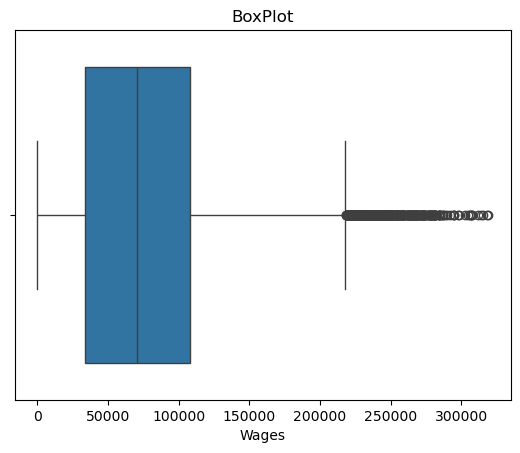

In [42]:
sns.boxplot(wage_data,orient='h')
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.show()

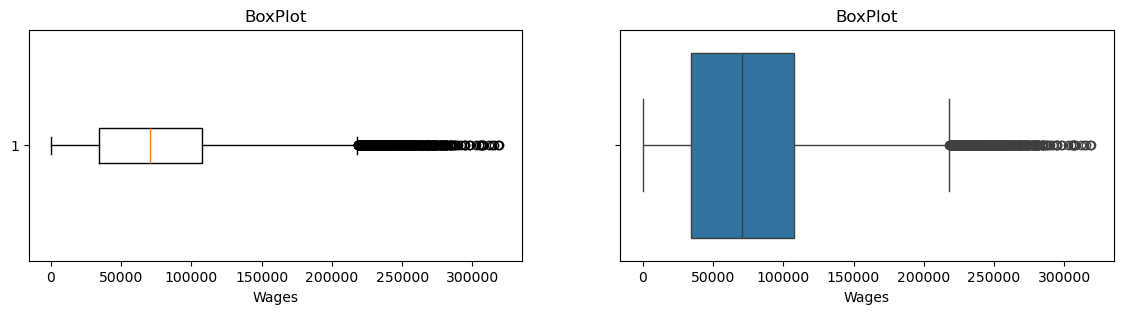

In [43]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.boxplot(wage_data,vert=False)
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.subplot(1,2,2)
sns.boxplot(wage_data,orient='h')
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.show()

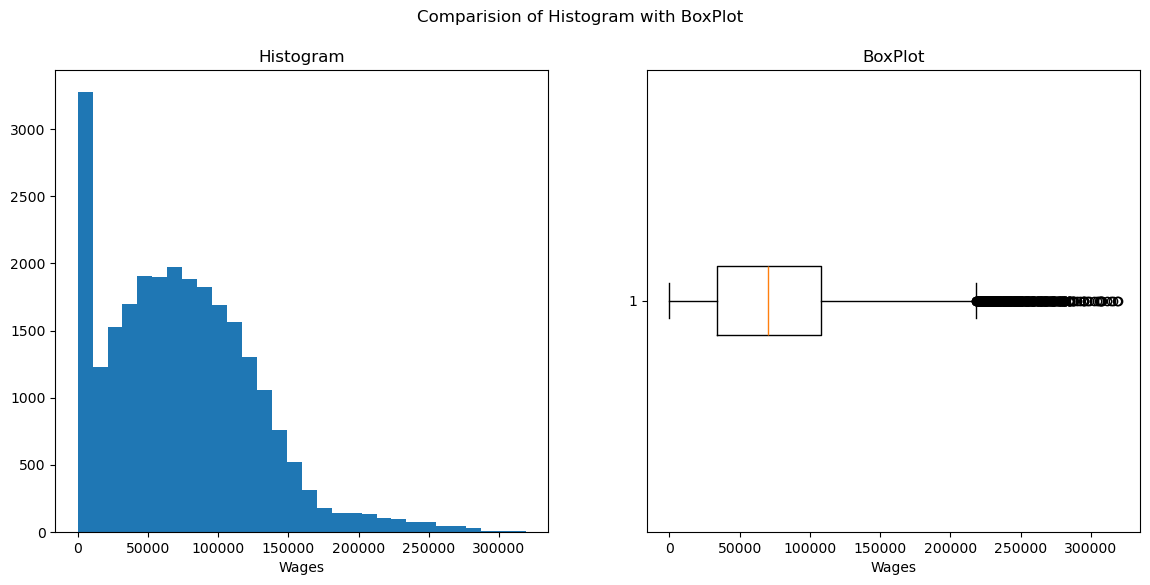

In [44]:
plt.figure(figsize=(14,6))
plt.suptitle('Comparision of Histogram with BoxPlot')
plt.subplot(1,2,1)
plt.hist(wage_data,30)
plt.title('Histogram')
plt.xlabel('Wages')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.show()

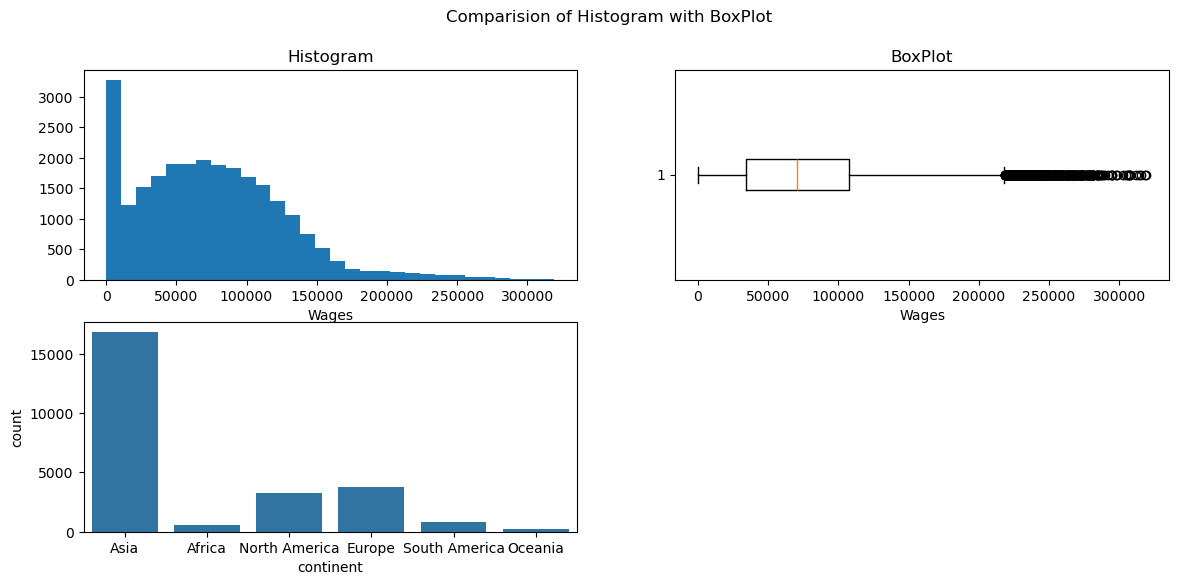

In [45]:
plt.figure(figsize=(14,6))
plt.suptitle('Comparision of Histogram with BoxPlot')
plt.subplot(2,2,1)
plt.hist(wage_data,30)
plt.title('Histogram')
plt.xlabel('Wages')
plt.subplot(2,2,2)
plt.boxplot(wage_data,vert=False)
plt.title('BoxPlot')
plt.xlabel('Wages')
plt.subplot(2,2,3)
sns.countplot(x='continent',data = visa_df)
plt.show()

In [2]:
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(14,5))
plt.subplot.hist(wage_data)

NameError: name 'visa_df' is not defined

**Find the Outliers**
- we already know that the outliers available less than Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
    1. Step 1
        - Q1 = 25p
        - Q2 = 50p
        - Q3 = 75p
    2. Step 2:
        - IQR = Q3 - Q1
    3. Step 3:
        - LB = Q1 - 1.5 * IQR
        - UB = Q3 + 1.5 * IQR
    4. Step 4:
        - con1 = wage_data < LB
        - con2 = wage_data > UB
        - con3 = con1 or-and con2 (we need to use bitwise operator)
        - as the above eq will check if its true or false so we are using bitwo
    5. Step 5: Data [con3]

In [52]:
wage_data = visa_df['prevailing_wage']
#Step:1
quartile_1=np.percentile(visa_df['prevailing_wage'],25)
quartile_2=np.percentile(visa_df['prevailing_wage'],50)
quartile_3=np.percentile(visa_df['prevailing_wage'],75)
#Step:2
IQR = quartile_3 - quartile_1
#Step:3
lower_bound = quartile_1 - (1.5 * IQR)
upper_bound = quartile_3 + (1.5 * IQR)
#Step:4
con_1 = wage_data < lower_bound # True or false
con_2 = wage_data > upper_bound # True or false
con_3 = con_1 | con_2 #We are comparing True or false
#Step:5
outliers_data_df = visa_df[con_3]
outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


**Finding Non - Outliers**

In [55]:
wage_data = visa_df['prevailing_wage']
#Step:1
quartile_1=np.percentile(visa_df['prevailing_wage'],25)
quartile_2=np.percentile(visa_df['prevailing_wage'],50)
quartile_3=np.percentile(visa_df['prevailing_wage'],75)
#Step:2
IQR = quartile_3 - quartile_1
#Step:3
lower_bound = quartile_1 - (1.5 * IQR)
upper_bound = quartile_3 + (1.5 * IQR)
#Step:4
con_1 = wage_data > lower_bound # True or false
con_2 = wage_data < upper_bound # True or false
con_3 = con_1 & con_2 #We are comparing True or false
#Step:5
non_outliers_data_df = visa_df[con_3]
non_outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


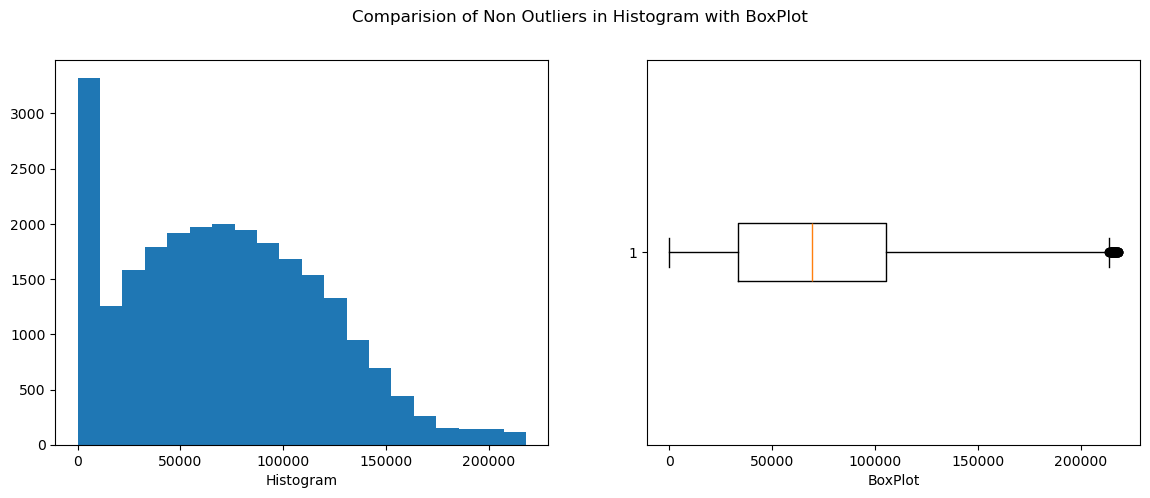

In [57]:
wage_data_non_outliers_data = non_outliers_data_df['prevailing_wage']
plt.figure(figsize= (14,5))
plt.suptitle('Comparision of Non Outliers in Histogram with BoxPlot')
plt.subplot(1,2,1).hist(wage_data_non_outliers_data,20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers_data,vert=False)
plt.xlabel('BoxPlot')
plt.show()

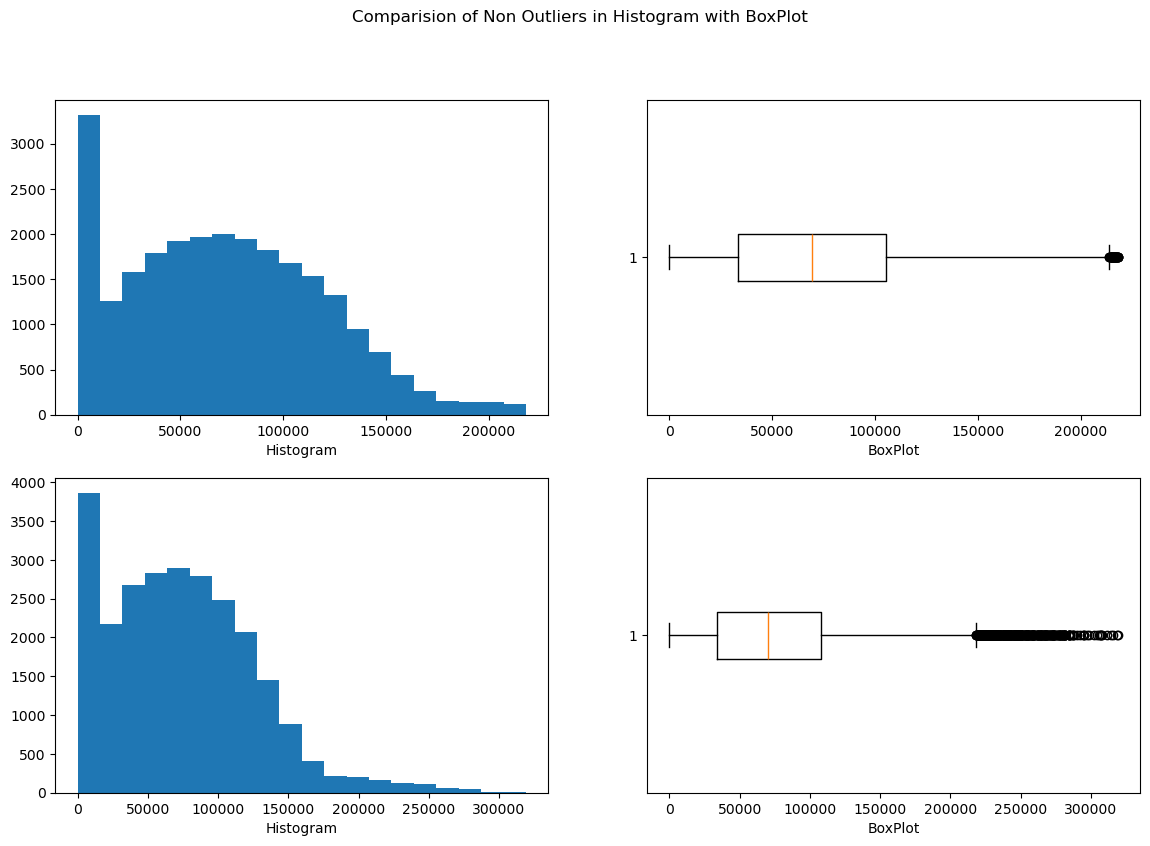

In [59]:
wage_data_non_outliers_data = non_outliers_data_df['prevailing_wage']
wage_data = visa_df['prevailing_wage']
plt.figure(figsize= (14,9))
plt.suptitle('Comparision of Non Outliers with Wage data')
plt.subplot(2,2,1).hist(wage_data_non_outliers_data,20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers_data,vert=False)
plt.xlabel('BoxPlot')
plt.suptitle('Comparision of Non Outliers in Histogram with BoxPlot')
plt.subplot(2,2,3).hist(wage_data,20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('BoxPlot')
plt.show()